In [ ]:
!pip install librosa

In [2]:
import librosa
from google.colab import drive
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

from tqdm import tqdm

import IPython.display

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


Small EDA of one signal

In [5]:
song_path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20190128-145230-45be2b1a85adc726-chest03.wav'

In [6]:
signal,sample_rate = librosa.load(song_path)


In [7]:
signal

array([ 5.85282396e-05,  1.18588883e-04,  1.92790190e-04, ...,
       -1.14588905e-02, -8.25630128e-03, -4.04791813e-03], dtype=float32)

In [8]:
signal.shape


(295911,)

In [9]:
IPython.display.Audio(signal, rate=sample_rate)

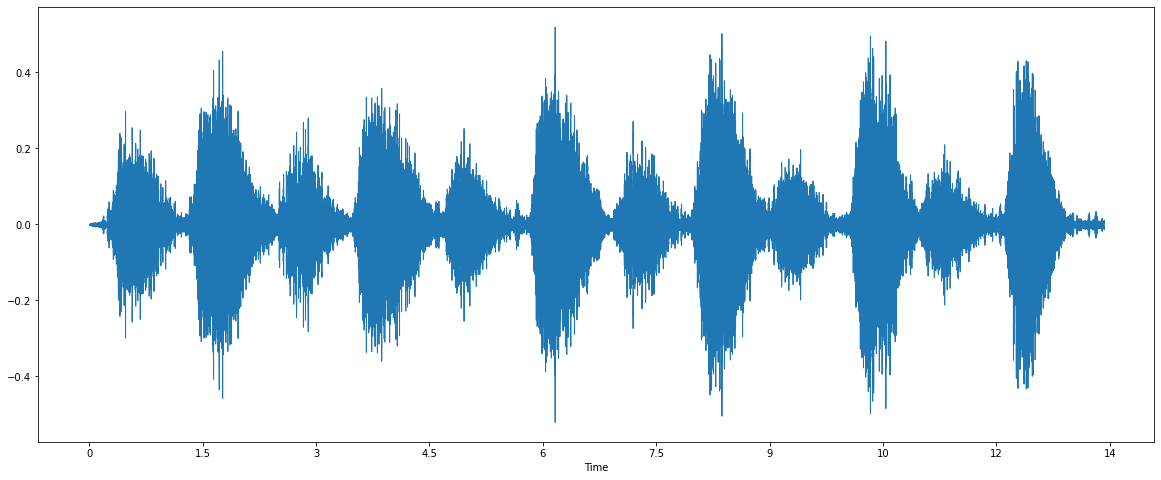

In [10]:
plt.figure(figsize = (20,8))
librosa.display.waveshow(signal,sr=sample_rate)
plt.show();

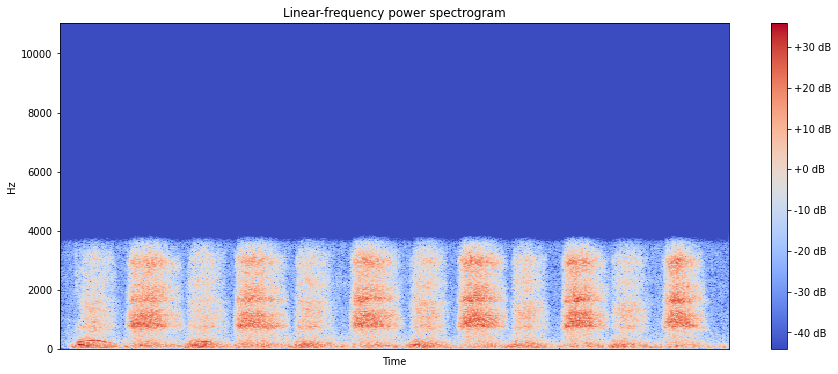

In [11]:
# Plot spectogram
plt.figure(figsize=(15, 6))
decibels = librosa.amplitude_to_db(np.abs(librosa.stft(signal)))
# amplitude_to_db converts an amplitude spectrogram to dB-scaled spectrogram
librosa.display.specshow(decibels, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.title('Linear-frequency power spectrogram')
plt.show()

In [12]:
# plt.figure(figsize=(15,6))
# pd.plotting.autocorrelation_plot(signal);

In [13]:
mfccs = librosa.feature.mfcc(signal, sr=sample_rate)
mfccs.shape

(20, 578)

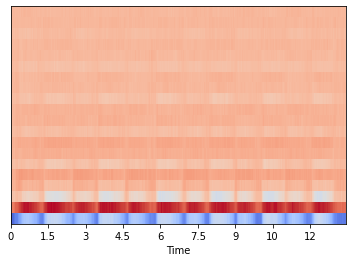

In [14]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time');

In [15]:
mfccs = preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-1.6499556e-09  1.3199645e-08 -1.1549689e-08  1.3199645e-08
  1.3199645e-08 -6.5998225e-09  1.3199645e-08  4.9498667e-09
 -1.3199645e-08 -4.9498667e-09  6.5998225e-09 -1.3199645e-08
  0.0000000e+00  6.5998225e-09 -1.3199645e-08 -3.2999112e-09
 -6.5998225e-09 -3.2999112e-09 -6.5998225e-09  0.0000000e+00]
[1.         1.0000001  1.         1.         1.0000001  1.
 1.0000001  1.0000001  1.0000001  1.0000001  1.         1.
 1.         1.0000001  1.0000002  1.         1.         0.9999999
 1.         0.99999976]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


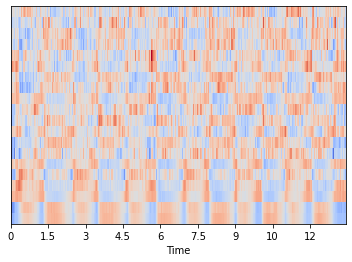

In [16]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time');

In [17]:
mfccs.T.shape # this will be input

(578, 20)

In [18]:
df_files = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/meta_last.csv')

This is dataframe with all links to files

In [19]:
df_files.shape

(3716, 7)

In [20]:
df_files.sample(5)

,id,path,point,time,model,label,duration
721,952996980471c7c9,NaN,chest04,20190417-145727,Redmi 6A Build/O11019,normal,0.000
2239,6f4d4122d433cc04,./audio_files/20210519-121339-6f4d4122d433cc04...,chest04,20210519-121339,Xiaomi Redmi Note 9 Pro | 10,problems,4.224
110,f3ff60338923c96c,./audio_files/20190201-153003-f3ff60338923c96c...,chest03,20190201-153003,ANE-LX1 Build/HUAWEIANE-LX1,normal,15.020
2924,ee6b818aedab8cb9,./audio_files/20210830-110356-ee6b818aedab8cb9...,spine04,20210830-110356,Xiaomi Redmi Note 9 Pro | 10,problems,3.584
2086,e8e1fbb1f6277344,./audio_files/20210420-114014-e8e1fbb1f6277344...,chest01,20210420-114014,HUAWEI ANE-LX1 | 8.0.0,problems,14.080


In [21]:
df_files['label'].value_counts()

normal       2201
problems     1451
incorrect      64
Name: label, dtype: int64

In [22]:
display(df_files.isna().sum(axis=0).sort_values(ascending = False).head(4))
df_files.isna().sum(axis=1).value_counts()

path     196
id         0
point      0
time       0
dtype: int64

0    3520
1     196
dtype: int64

In [23]:
df_files.drop(df_files[df_files['path'].isna()].index, axis=0, inplace=True)

There were rows w/o links to files 

In [24]:
df_files.where(df_files['label'] == 'incorrect')

,id,path,point,time,model,label,duration
0,ded01c9104a0b854,./audio_files/20181218-183956-ded01c9104a0b854...,chest01,20181218-183956,HUAWEI P8max,incorrect,7.50
1,ded01c9104a0b854,./audio_files/20181218-183956-ded01c9104a0b854...,chest02,20181218-183956,HUAWEI P8max,incorrect,8.36
2,ded01c9104a0b854,./audio_files/20181218-183956-ded01c9104a0b854...,chest03,20181218-183956,HUAWEI P8max,incorrect,10.26
3,ded01c9104a0b854,./audio_files/20181218-183956-ded01c9104a0b854...,chest04,20181218-183956,HUAWEI P8max,incorrect,10.44
4,ded01c9104a0b854,./audio_files/20181218-183956-ded01c9104a0b854...,spine02,20181218-183956,HUAWEI P8max,incorrect,10.60
...,...,...,...,...,...,...,...
3711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I drop rows where the label is incorrect

In [25]:
df_files.drop(df_files[df_files['label'] == 'incorrect'].index, axis=0, inplace=True)

In [26]:
df_files['label'].value_counts()

normal      2008
problems    1450
Name: label, dtype: int64

Encoding of target to 0/1 where 1 is sick

In [27]:
df_files['target'] = 0
df_files.loc[df_files[df_files['label'] == 'problems'].index,'target'] = 1

In [28]:
df_files['target'].value_counts()

0    2008
1    1450
Name: target, dtype: int64

In [29]:
df_files.sample(5)

,id,path,point,time,model,label,duration,target
3543,140f57f9aebf5f07,./audio_files/20211201-140621-140f57f9aebf5f07...,spine06,20211201-140621,Xiaomi Redmi Note 9 Pro | 11,normal,17.280,0
3516,9a5488f27ac941de,./audio_files/20211201-110208-9a5488f27ac941de...,chest01,20211201-110208,Xiaomi Redmi Note 9 Pro | 10,problems,9.472,1
1436,c66ddbb4aa53f41e,./audio_files/20200220-020028-c66ddbb4aa53f41e...,chest01,20200220-020028,OnePlus ONEPLUS A5010 | 9,normal,0.896,0
3434,72f6db6a66d8d167,./audio_files/20211118-123021-72f6db6a66d8d167...,spine04,20211118-123021,Xiaomi Redmi Note 9 Pro | 10,problems,12.544,1
2799,9a06860ae58fc177,./audio_files/20210713-155013-9a06860ae58fc177...,chest04,20210713-155013,Xiaomi Redmi Note 9 Pro | 10,normal,3.584,0


In [30]:
df_files.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3458 entries, 10 to 3715
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        3458 non-null   object 
 1   path      3458 non-null   object 
 2   point     3458 non-null   object 
 3   time      3458 non-null   object 
 4   model     3458 non-null   object 
 5   label     3458 non-null   object 
 6   duration  3458 non-null   float64
 7   target    3458 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 372.2+ KB


time column to Datetime in pandas

In [31]:
df_files['Date'] = df_files['time'].str.slice(start=0, stop=8)
df_files['Time'] = df_files['time'].str.slice(start=9, stop=11) + ':' + df_files['time'].str.slice(start=11, stop=13)



In [32]:
df_files.head(5)

,id,path,point,time,model,label,duration,target,Date,Time
10,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest01,20181225-130322,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,20181225,13:03
11,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest02,20181225-130322,CPU iPhone OS 12_1 like Mac OS X,problems,16.045000,1,20181225,13:03
12,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest03,20181225-130322,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,20181225,13:03
13,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest04,20181225-130322,CPU iPhone OS 12_1 like Mac OS X,problems,15.766375,1,20181225,13:03
14,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,spine02,20181225-130322,CPU iPhone OS 12_1 like Mac OS X,problems,15.836000,1,20181225,13:03


In [33]:
# Convert the date and time components into a datetime object
df_files['Datetime'] = pd.to_datetime(df_files['Date'].astype(str) + ' ' + df_files['Time'], format='%Y%m%d %H:%M')

# Drop the intermediate date and time columns and display the resulting DataFrame
df_files.drop(['time', 'Date', 'Time'], axis=1, inplace=True)


In [34]:
df_files.head()

,id,path,point,model,label,duration,target,Datetime
10,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest01,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,2018-12-25 13:03:00
11,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest02,CPU iPhone OS 12_1 like Mac OS X,problems,16.045000,1,2018-12-25 13:03:00
12,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest03,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,2018-12-25 13:03:00
13,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest04,CPU iPhone OS 12_1 like Mac OS X,problems,15.766375,1,2018-12-25 13:03:00
14,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,spine02,CPU iPhone OS 12_1 like Mac OS X,problems,15.836000,1,2018-12-25 13:03:00


Not all the files were good, author said need to filter by date

In [35]:
df_files[df_files['Datetime'] < '2019-08-14']

,id,path,point,model,label,duration,target,Datetime
10,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest01,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,2018-12-25 13:03:00
11,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest02,CPU iPhone OS 12_1 like Mac OS X,problems,16.045000,1,2018-12-25 13:03:00
12,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest03,CPU iPhone OS 12_1 like Mac OS X,problems,15.882500,1,2018-12-25 13:03:00
13,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,chest04,CPU iPhone OS 12_1 like Mac OS X,problems,15.766375,1,2018-12-25 13:03:00
14,f1f1589e22ce26ae,./audio_files/20181225-130322-f1f1589e22ce26ae...,spine02,CPU iPhone OS 12_1 like Mac OS X,problems,15.836000,1,2018-12-25 13:03:00
...,...,...,...,...,...,...,...,...
1181,409524b9fc5a2360,./audio_files/20190809-151512-409524b9fc5a2360...,spine03,HUAWEI ANE-LX1 | 8.0.0,normal,11.136000,0,2019-08-09 15:15:00
1182,409524b9fc5a2360,./audio_files/20190809-151512-409524b9fc5a2360...,spine01,HUAWEI ANE-LX1 | 8.0.0,normal,9.216000,0,2019-08-09 15:15:00
1183,409524b9fc5a2360,./audio_files/20190809-151512-409524b9fc5a2360...,spine06,HUAWEI ANE-LX1 | 8.0.0,normal,11.392000,0,2019-08-09 15:15:00
1184,409524b9fc5a2360,./audio_files/20190809-151512-409524b9fc5a2360...,spine04,HUAWEI ANE-LX1 | 8.0.0,normal,12.672000,0,2019-08-09 15:15:00


In [36]:
df_files.drop(df_files[df_files['Datetime'] < '2019-08-14'].index, axis=0, inplace=True)
df_files.drop(df_files[df_files['Datetime'] > '2021-12-24'].index, axis=0, inplace=True)
df_files.shape

(2494, 8)

In [37]:
df_files.reset_index(inplace=True)

This is the longest track, the arrays must be of its length

In [38]:
df_files[df_files['duration'] == df_files['duration'].max()]

,index,id,path,point,model,label,duration,target,Datetime
2489,3691,aadc0d4908a11f09,./audio_files/20211218-231322-aadc0d4908a11f09...,spine03,Xiaomi Redmi Note 9 Pro | 11,normal,47.744,0,2021-12-18 23:13:00


In [39]:
df_files.describe()

,index,duration,target
count,2494.000000,2494.000000,2494.000000
mean,2435.841219,6.209180,0.469527
std,722.122013,5.176958,0.499171
min,1186.000000,0.128000,0.000000
25%,1811.250000,1.152000,0.000000
50%,2435.500000,5.376000,0.000000
75%,3061.750000,9.088000,1.000000
max,3695.000000,47.744000,1.000000


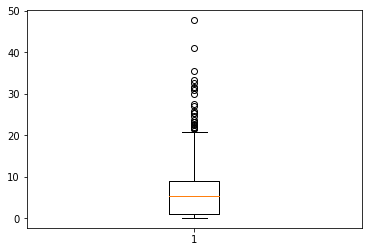

In [40]:
plt.boxplot(df_files['duration']);

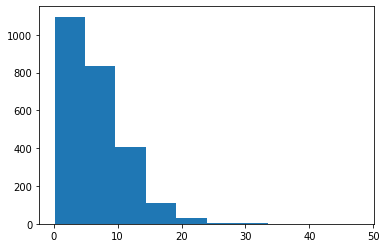

In [41]:
plt.hist(df_files['duration']);

Tracks with duration less than 1 sec are not informative

In [42]:
# df_files.drop(df_files[df_files['duration'] < 1].index, axis=0, inplace=True)
# df_files.reset_index(inplace=True)
# df_files.shape

In [43]:
df_files.head()

,index,id,path,point,model,label,duration,target,Datetime
0,1186,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest01,samsung SM-A605FN | 8.0.0,normal,1.408,0,2019-08-14 22:00:00
1,1187,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest02,samsung SM-A605FN | 8.0.0,normal,1.792,0,2019-08-14 22:00:00
2,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,samsung SM-A605FN | 8.0.0,normal,2.944,0,2019-08-14 22:00:00
3,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,samsung SM-A605FN | 8.0.0,normal,3.584,0,2019-08-14 22:00:00
4,1190,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,spine02,samsung SM-A605FN | 8.0.0,normal,1.152,0,2019-08-14 22:00:00


In [67]:
df_positive = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/positives.csv', header=None)

In [68]:
df_negative = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/negatives.csv', header=None)

In [69]:
df_positive = './audio_files/' +  df_positive[0].str.lstrip('http://lungs.makseq.com/data/service/')


In [70]:
df_negative = './audio_files/' +  df_negative[0].str.lstrip('http://lungs.makseq.com/data/service/')

In [71]:
df_positive

0      ./audio_files/20211101-125147-b5a05864b4f448a1...
1      ./audio_files/20211101-125147-b5a05864b4f448a1...
2      ./audio_files/20211101-125147-b5a05864b4f448a1...
3      ./audio_files/20211029-100738-0657eaa451ac2742...
4      ./audio_files/20211029-100738-0657eaa451ac2742...
                             ...                        
145    ./audio_files/20210915-140850-d594cbe6e2461128...
146    ./audio_files/20210916-115907-e56a0cb1b234b74f...
147    ./audio_files/20210916-115907-e56a0cb1b234b74f...
148    ./audio_files/20210916-115907-e56a0cb1b234b74f...
149    ./audio_files/20210916-115907-e56a0cb1b234b74f...
Name: 0, Length: 150, dtype: object

In [80]:
df_files[df_files['path'].isin(df_positive)]['target'].sum()

148

In [ ]:
#two labels incorrect

In [76]:
df_files.loc[df_files['path'].isin(df_positive), 'target'] = 1

In [79]:
df_files[df_files['path'].isin(df_negative)]['target'].sum()

0

In [ ]:
#34 labels are incorrect

In [78]:
df_files.loc[df_files['path'].isin(df_negative), 'target'] = 0

In [81]:
from os.path import exists

In [82]:
df_files.shape

(2494, 9)

In [83]:
for ind, row in df_files.iterrows():
  if not exists('/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/' + df_files.loc[ind,'path'].lstrip('.')):
    df_files = df_files.drop(ind)
  

In [84]:
df_files.shape

(2494, 9)

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210708-181651-8d2f44a674db93a2-spine02.wav


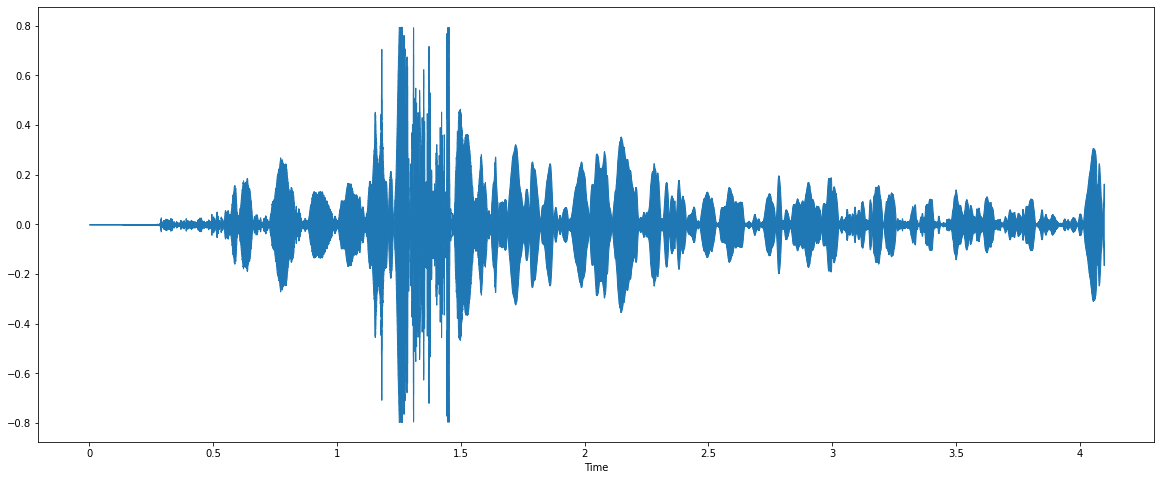

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20200310-130113-13e177541e7ebb1a-spine03.wav


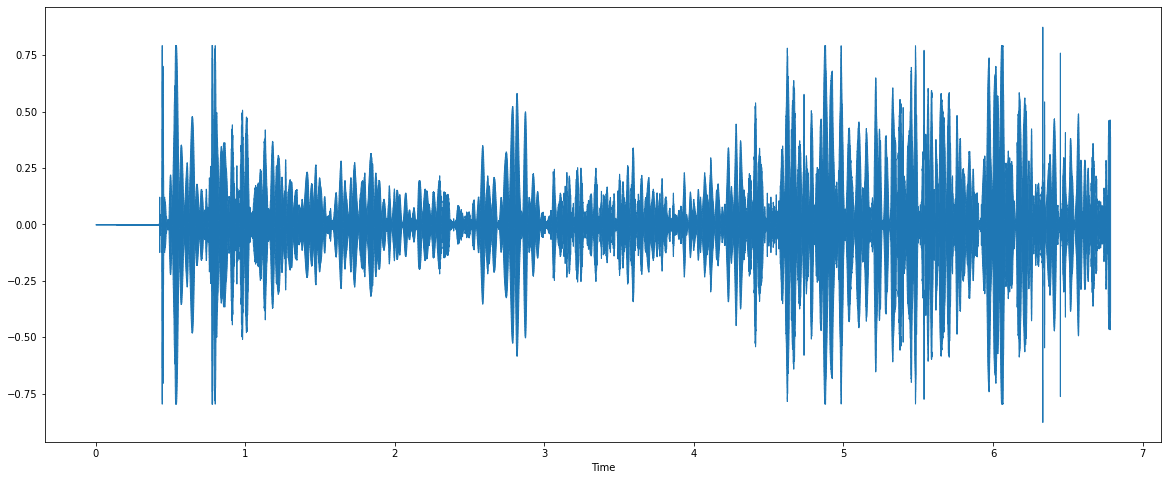

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210423-115328-80d4639d94db6ac7-spine05.wav


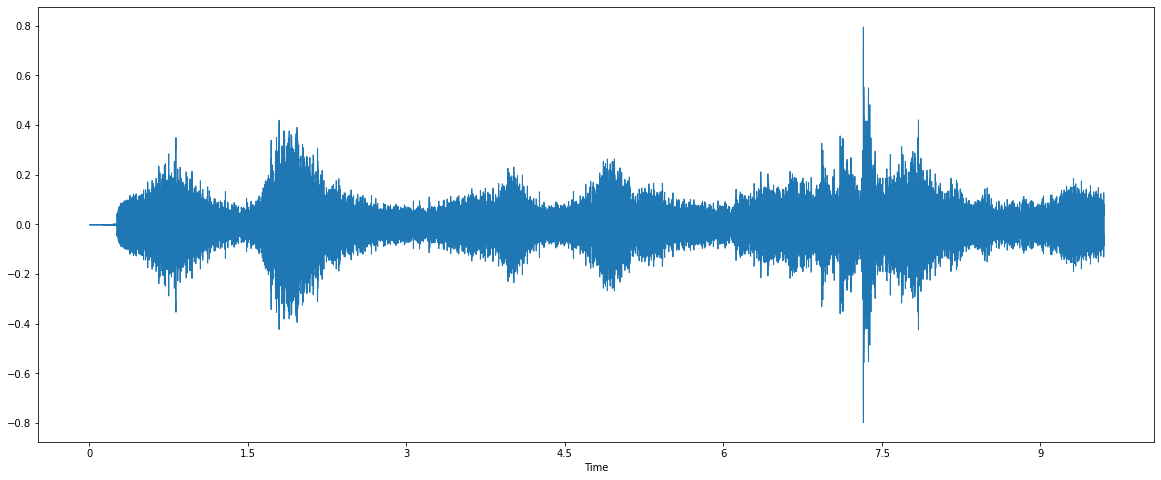

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20200220-020028-c66ddbb4aa53f41e-chest02.wav


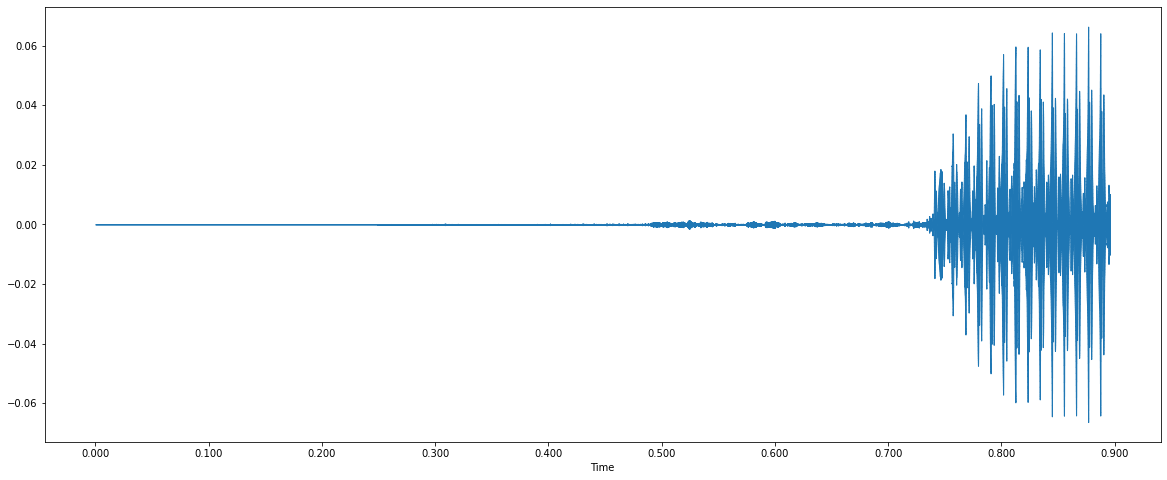

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20211101-125147-b5a05864b4f448a1-spine06.wav


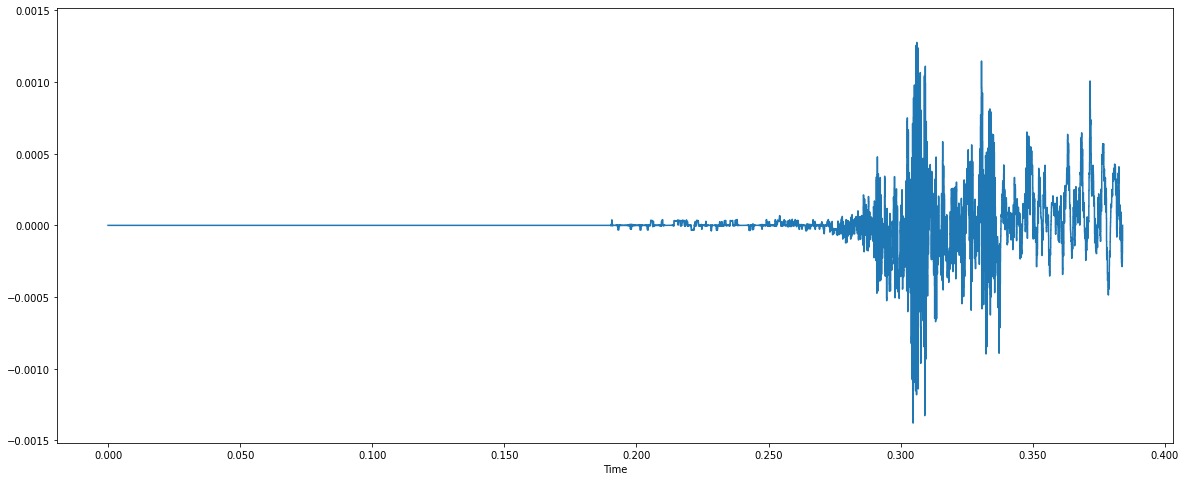

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210125-164839-e4a0dc516c453460-spine04.wav


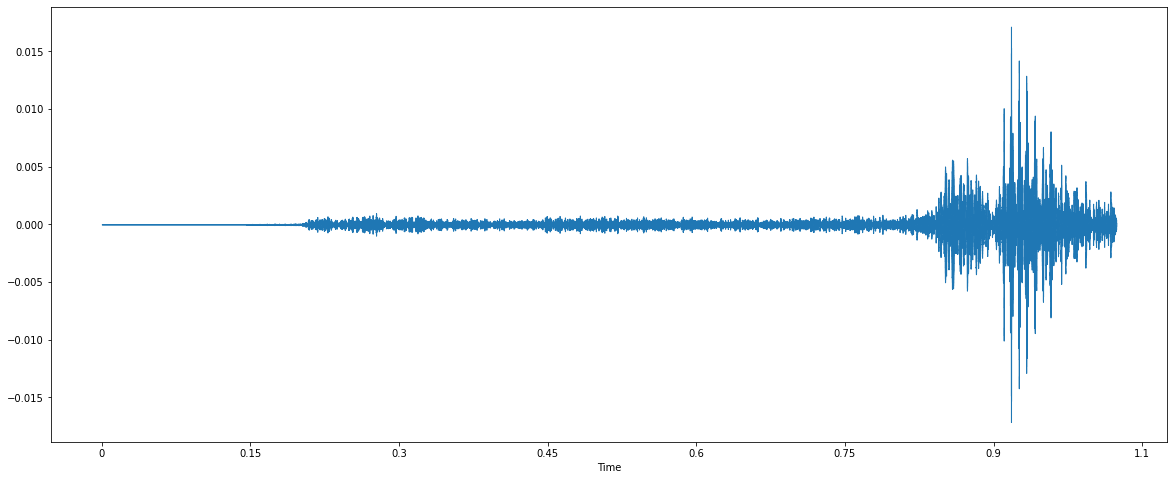

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20200311-112144-eb50ca6be66b8aff-chest01.wav


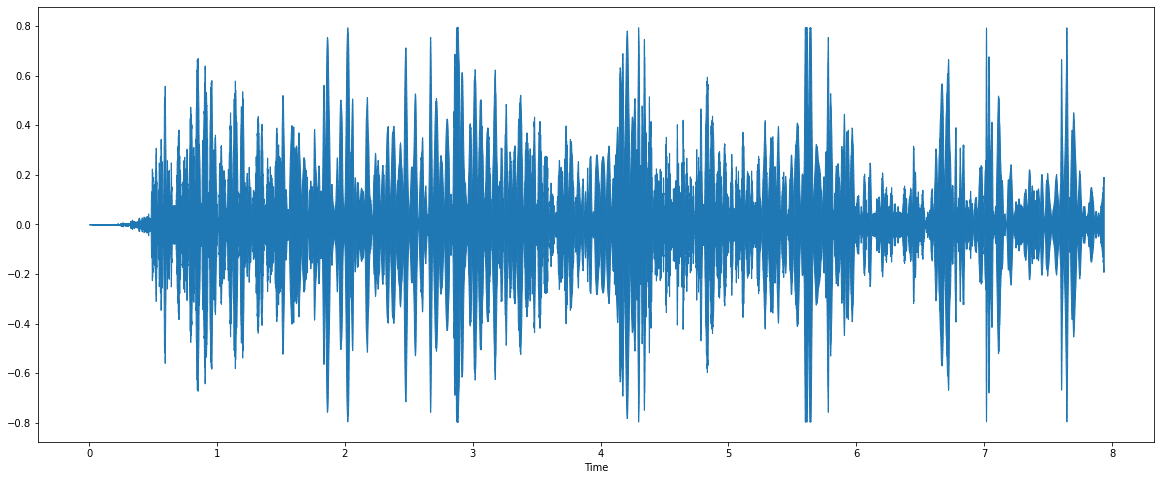

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210713-153610-c109588031b76fa8-chest03.wav


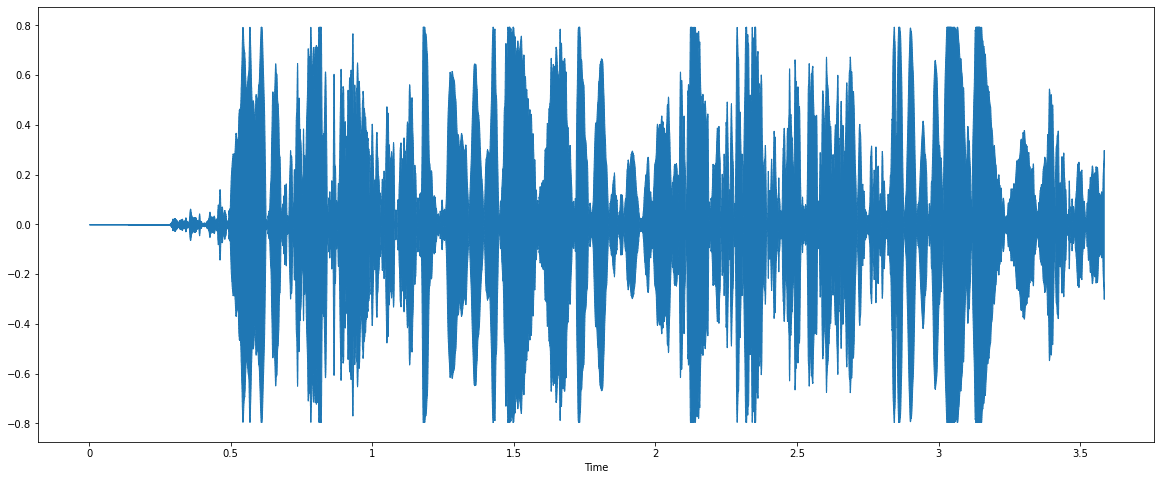

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210708-183927-1449f80965ed0aab-spine06.wav


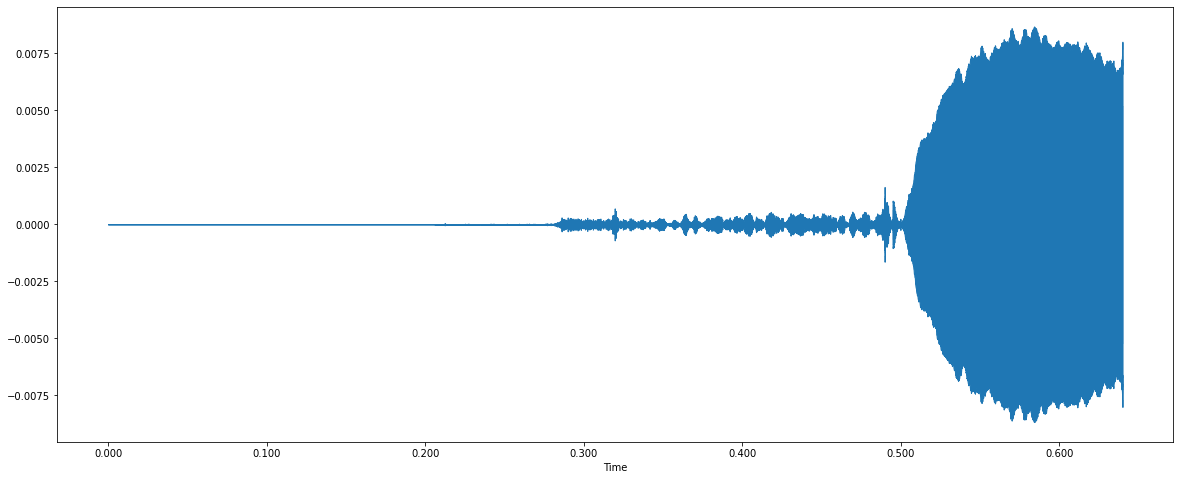

/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210629-095503-c595452dd49fd4be-spine01.wav


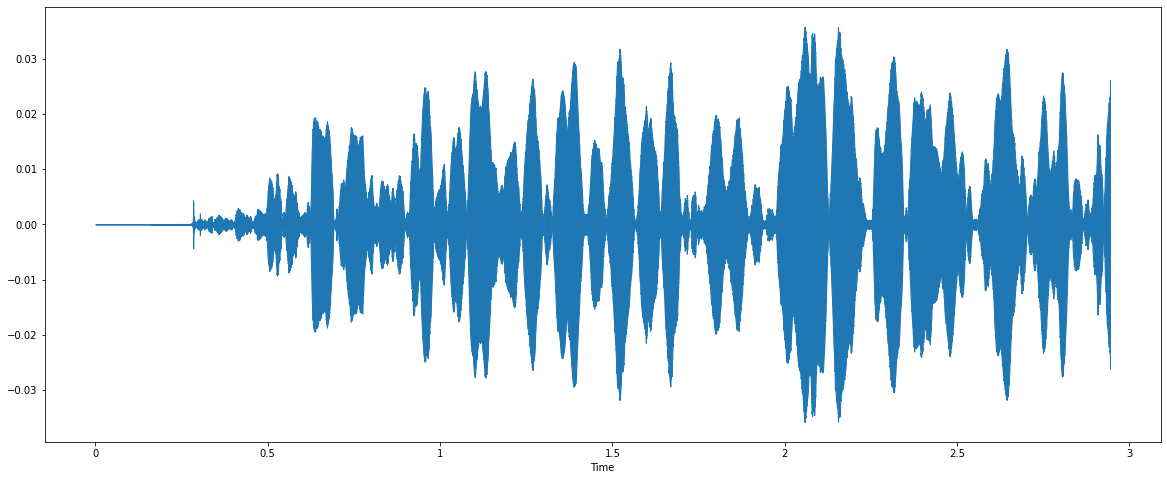

In [ ]:
for row in np.random.randint(0, len(df_files['path']), 10):
  path_temp = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[row, 'path'].lstrip('.')
  signal_temp,sample_rate_temp = librosa.load(path_temp)
  plt.figure(figsize = (20,8))
  librosa.display.waveshow(signal_temp,sr=sample_rate)
  print(path_temp)
  plt.show();

In [ ]:
df_files

,index,id,path,point,model,label,duration,target,Datetime
0,1186,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest01,samsung SM-A605FN | 8.0.0,normal,1.408,0,2019-08-14 22:00:00
1,1187,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest02,samsung SM-A605FN | 8.0.0,normal,1.792,0,2019-08-14 22:00:00
2,1188,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest03,samsung SM-A605FN | 8.0.0,normal,2.944,0,2019-08-14 22:00:00
3,1189,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,chest04,samsung SM-A605FN | 8.0.0,normal,3.584,0,2019-08-14 22:00:00
4,1190,e70516a491f41f9d,./audio_files/20190814-220020-e70516a491f41f9d...,spine02,samsung SM-A605FN | 8.0.0,normal,1.152,0,2019-08-14 22:00:00
...,...,...,...,...,...,...,...,...,...
2489,3691,aadc0d4908a11f09,./audio_files/20211218-231322-aadc0d4908a11f09...,spine03,Xiaomi Redmi Note 9 Pro | 11,normal,47.744,0,2021-12-18 23:13:00
2490,3692,aadc0d4908a11f09,./audio_files/20211218-231322-aadc0d4908a11f09...,spine01,Xiaomi Redmi Note 9 Pro | 11,normal,30.848,0,2021-12-18 23:13:00
2491,3693,aadc0d4908a11f09,./audio_files/20211218-231322-aadc0d4908a11f09...,spine06,Xiaomi Redmi Note 9 Pro | 11,normal,22.528,0,2021-12-18 23:13:00
2492,3694,aadc0d4908a11f09,./audio_files/20211218-231322-aadc0d4908a11f09...,spine04,Xiaomi Redmi Note 9 Pro | 11,normal,23.168,0,2021-12-18 23:13:00


In [ ]:
# df_files.drop(df_files[df_files['duration'] < 1].index, axis=0, inplace=True)
# df_files.reset_index(inplace=True)
# df_files.shape

In [89]:
threshold = 2
zeros = 0
shorts = 0
error_duration = []
errors = 0
short_indexes = []
durations = []
for i, row in tqdm(df_files.iterrows(), total=len(df_files['path'])):
    path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
    signal,sample_rate = librosa.load(path)
    if signal.sum() == 0:
      # print('zero  ', path)
      zeros += 1
    else: 
      try:
        if librosa.get_duration(signal, sample_rate) < threshold:
        # print('less than second', path, librosa.get_duration(signal, sample_rate))
          shorts += 1
          short_indexes.append(i)
        durations.append(librosa.get_duration(signal, sample_rate))
      except:
        errors += 1
        error_duration.append(path)


100%|██████████| 2494/2494 [06:06<00:00,  6.80it/s]


In [91]:
shorts, zeros, errors, len(df_files['path'])

(629, 54, 0, 2494)

In [90]:
error_duration

[]

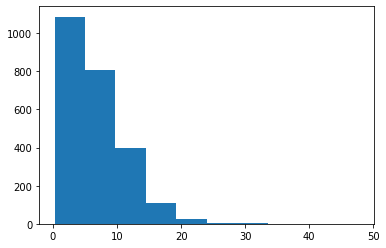

In [92]:
plt.hist(durations);

In [93]:
path_weak = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210308-140643-d90e6306cb7373be-spine03.wav'
signal_weak,sample_rate_weak = librosa.load(path)

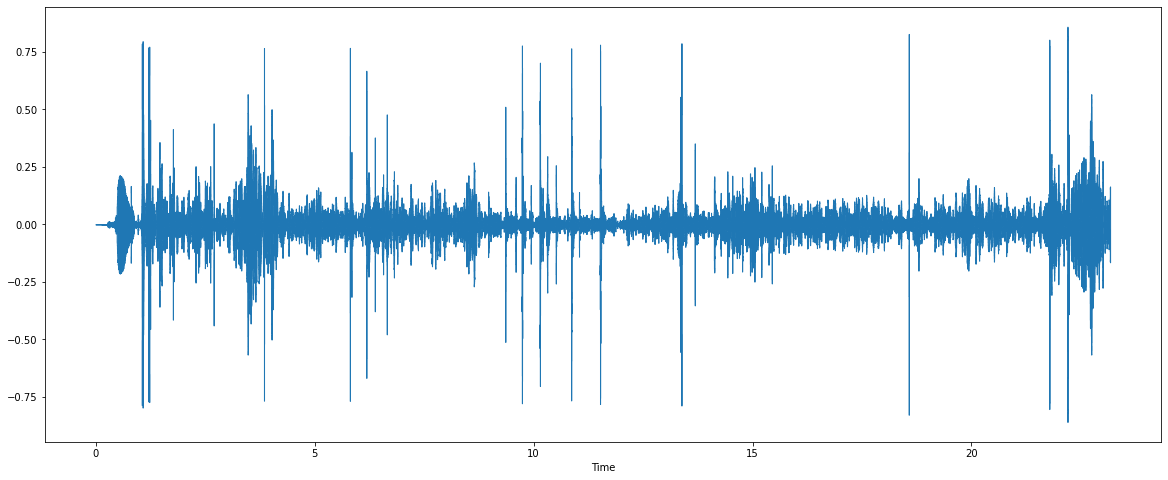

In [94]:
plt.figure(figsize = (20,8))
librosa.display.waveshow(signal_weak,sr=sample_rate)
plt.show();

In [ ]:
IPython.display.Audio(signal_weak, rate=sample_rate)

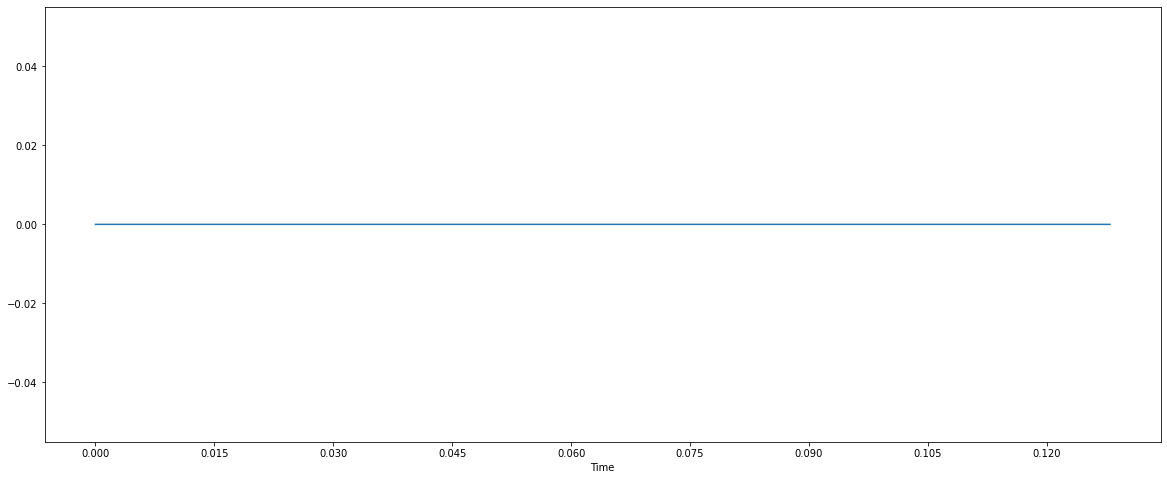

In [95]:
path_to_check = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20210318-161442-17055ed87a4cf49b-spine03.wav'
signal_check,sample_rate_check = librosa.load(path_to_check) 
plt.figure(figsize = (20,8))
librosa.display.waveshow(signal_check,sr=sample_rate)
plt.show();


In [96]:
threshold = 2
delete_index = []
errors = 0

for i, row in tqdm(df_files.iterrows(), total=len(df_files['path'])):
    path = '/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
    signal,sample_rate = librosa.load(path)
    if signal.sum() == 0:
      # print('zero  ', path)
      delete_index.append(i)
    else: 
      try:
        if librosa.get_duration(signal, sample_rate) < threshold:
          delete_index.append(i)
      except:
        errors += 1
        delete_index.append(i)

100%|██████████| 2494/2494 [06:32<00:00,  6.36it/s]


In [97]:
len(delete_index), delete_index[9]

(683, 240)

In [98]:
df_files.shape

(2494, 9)

In [99]:
df_files = df_files.drop(delete_index)

In [100]:
df_files.shape

(1811, 9)

In [101]:
features = ['id', 'model', 'Datetime', 'point', 'path']

In [102]:
df_features = df_files[features]

Split into train and test

In [103]:
path_train, path_test, y_train, y_test = train_test_split(df_features, df_files['target'], 
                                                    test_size=0.2 ,random_state=99)

In [104]:
path_train.shape, path_test.shape, y_train.shape, y_test.shape

((1448, 5), (363, 5), (1448,), (363,))

In [105]:
path_train.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/path_train.csv")
y_train.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_train.csv")
path_test.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/path_test.csv", index=False)
y_test.to_csv("/content/drive/MyDrive/Colab Notebooks/Project/y_test.csv", index=False)

In [106]:
path_train.head()

,id,model,Datetime,point,path
1937,7e47c5ae6034a1a3,Xiaomi Redmi Note 9 Pro | 10,2021-10-05 09:56:00,chest04,./audio_files/20211005-095645-7e47c5ae6034a1a3...
2311,64f9c13f97eee760,Xiaomi Redmi Note 9 Pro | 11,2021-11-30 12:13:00,spine06,./audio_files/20211130-121333-64f9c13f97eee760...
1105,201e5e0eb13582ab,Xiaomi Redmi Note 9 Pro | 10,2021-06-01 12:33:00,spine04,./audio_files/20210601-123329-201e5e0eb13582ab...
1533,f465ff10f8dabe78,Xiaomi Redmi Note 9 Pro | 10,2021-07-13 15:26:00,spine01,./audio_files/20210713-152640-f465ff10f8dabe78...
2293,78633fe38950f24b,Xiaomi Redmi Note 9 Pro | 11,2021-11-29 12:48:00,spine05,./audio_files/20211129-124812-78633fe38950f24b...


In [107]:
y_train.head()

1937    0
2311    0
1105    1
1533    0
2293    1
Name: target, dtype: int64

'/content/drive/MyDrive/Colab Notebooks/Project/pneumonia_files/audio_files/20190820-082529-b8715e18c465d450-spine05.wav'

Gather all tracks into a dataframe, using the train set of paths to files

In [ ]:
# df_features = pd.DataFrame()
# for i in tqdm(df_files.index):
#     path = '/Users/stanislavnevyazhsky/My Drive/Colab Notebooks/Project/pneumonia_files' + df_files.loc[i]['path'].lstrip('.')
#     track,sample_rate = librosa.load(path)
#     # signal = np.pad(signal, (0, max_length-len(signal), 'constant')
#     df_features = df_features.append(pd.Series(track), ignore_index=True)
#     print(i, path)
  

In [ ]:
# df_target = df_files['target']

In [ ]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape


In [ ]:
# X_train.fillna(value=0.0, inplace=True)
# X_test.fillna(value=0.0, inplace=True)

In [ ]:
# zeros = pd.DataFrame(0, index=X_train.index, columns=[X_train.columns[-1] + i+1 for i in range(X_test.columns.shape[0])])

